Tin Dizdarevic 

UCID: 31509390

ENGR 301 - Laboratory 4

Topic: Mechanical Engineeriring


In [ ]:
from google.colab import drive, files
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Part 1 - Linear Regression, Regularization, and the Limits of Linear Regression

## 1.1

In [ ]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2

In [ ]:
columns = ["Lever position (lp)","Ship speed (v) [knots]",
           "Gas Turbine shaft torque (GTT) [kN m]",
           "Gas Turbine rate of revolutions (GTn) [rpm]",
           "Gas Generator rate of revolutions (GGn) [rpm]",
           "Starboard Propeller Torque (Ts) [kN]",
           "Port Propeller Torque (Tp) [kN]",
           "HP Turbine exit temperature (T48) [C]",
           "GT Compressor inlet air temperature (T1) [C]",
           "GT Compressor outlet air temperature (T2) [C]",
           "HP Turbine exit pressure (P48) [bar]",
           "GT Compressor inlet air pressure (P1) [bar]",
           "GT Compressor outlet air pressure (P2) [bar]",
           "Gas Turbine exhaust gas pressure (Pexh) [bar]",
           "Turbine Injecton Control (TIC) [%]",
           "Fuel flow (mf) [kg/s]",
           "GT Compressor decay state coefficient",
           "GT Turbine decay state coefficient"]

dfPartCondition = pd.read_csv('drive/My Drive/Colab Notebooks/ENGR 301/Lab 4/part_condition.csv',
                 delim_whitespace = True,
                 header = None,
                 names = columns)

dfPartCondition.head()

,Lever position (lp),Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


## 1.3

There are many correlated features, but there is a very obvious trend visible from the heatmap below. Decay Coeefficients are not highly correlated to any other feature. Also, GT Compressor inlet air pressure isn't significantly correlated to other features.

Text(0.5, 1.0, 'Correlation Heatmap')

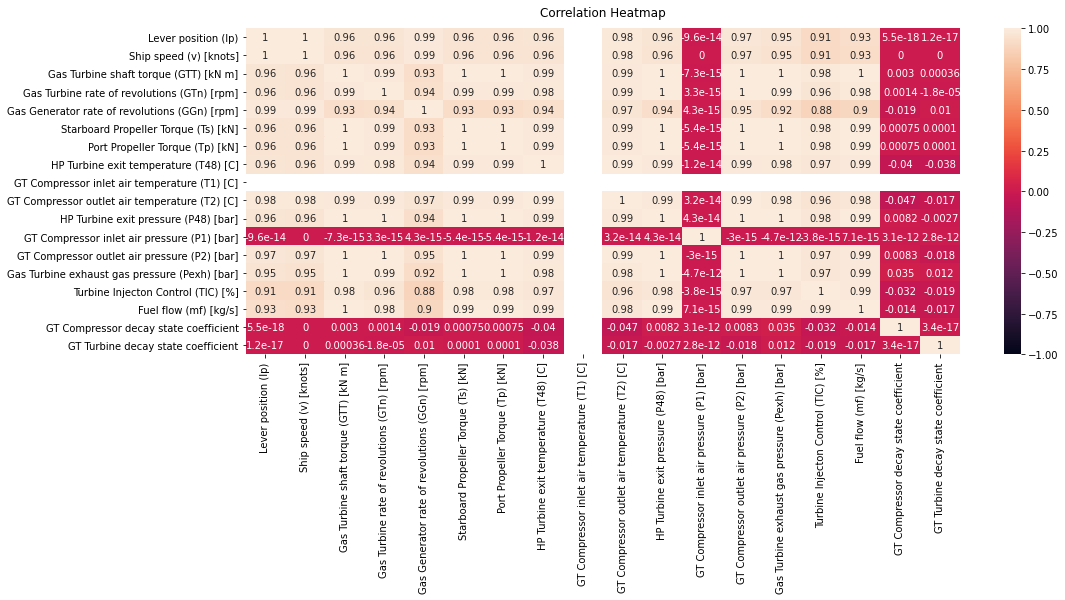

In [ ]:
plt.figure(figsize=(16,6))

heatmap = sns.heatmap(dfPartCondition.corr(), vmin = -1, vmax = 1, annot=True)
heatmap.set_title("Correlation Heatmap", fontdict={'fontsize':12}, pad=12)

## 1.4

In [ ]:
# import packages from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### a) 
The GT Turbine decay state coefficient is better at predicted using a linear regression model since $R^2$ score has a bigger value, both for test and training set.


In [ ]:
x1 = np.array(dfPartCondition.drop("GT Compressor decay state coefficient", 
                                   axis=1))
y1 = np.array(dfPartCondition["GT Compressor decay state coefficient"])

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3)

CDModel = LinearRegression()
CDModel.fit(x_train1, y_train1)

y_predict1 = CDModel.predict(x_test1)

trainingR2Score1 = CDModel.score(x_train1, y_train1)
testR2Score1 = r2_score(y_test1, y_predict1)
print ("Training Score: " + str(trainingR2Score1))
print ("Test Score: " + str(testR2Score1))

Training Score: 0.9004419827934688
Test Score: 0.902263635681191


In [ ]:
x2 = np.array(dfPartCondition.drop("GT Turbine decay state coefficient",
                                   axis=1))
y2 = np.array(dfPartCondition["GT Turbine decay state coefficient"])

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3)

TDModel = LinearRegression()
TDModel.fit(x_train2, y_train2)

y_predict2 = TDModel.predict(x_test2)

trainingR2Score2 = r2_score(y_test2, y_predict2)
testR2Score2 = TDModel.score(x_test2, y_test2)
print ("Training Score: " + str(trainingR2Score2))
print ("Test Score: " + str(testR2Score2))

Training Score: 0.942808596425601
Test Score: 0.942808596425601


### b)


None of the models seem appropriate for analysis, resiudal plots have an obvious pattern and are not evenly distributed. We should consider using another model for this problem.

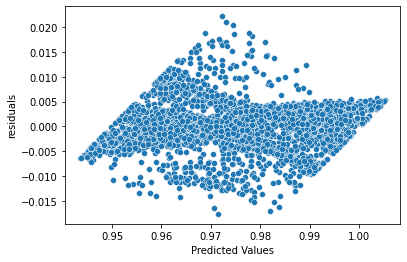

In [ ]:
residuals1 = (y_predict1 - y_test1)
ax = sns.scatterplot(x=y_predict1, y=residuals1)
ax.set(xlabel='Predicted Values', ylabel='residuals')
ax

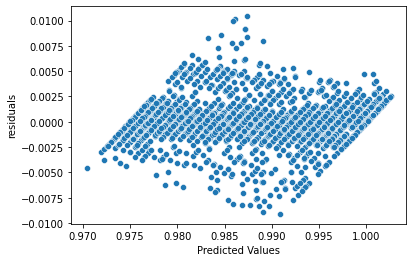

In [ ]:
residuals2 = (y_predict2 - y_test2)
ax = sns.scatterplot(x=y_predict2, y=residuals2)
ax.set(xlabel='Predicted Values', ylabel='residuals')
ax

### c)
I am predicting GT Turbine decay state coefficient, and I am using all the other predictors as input. 




## 1.5


Using the penalization paramteter results in a smaller $R^2$ score. 

There exists two norms, L1 and L2 which measure the magnitude od weights. Focusing on L2, it is a sum of squared values of weights. As we add more weights and as the weights become bigger, the norm will become larger as well. When we want to minimize the norm, we want the function to be less complex and therefore minimizing the norm encourages the weights to be small. Norm is later used in regularization where penalty for higher norms is introduced. 

Training error can be reduced using a bigger complexity of the function. In reality it is possible to reduce the training error to almost zero for most datasets, where we just have to select a model that's complicated enough. Unfortunaltely, this is not a very good tactic becaus it leads to overfitting.

We can introduce a new parameter (in this case alpha), that regulates the relative importance the of the penalty term, compared to the MSE. This parameter together with the polynomial order is what we call hyperparameters and we need to optimize them as both are needed for the determination of our final hypothesis.

Increasing the hyperparameter leads to lower $R^2$ scores, and this is not surprising, because the penatly term shouldn't have the same relative importance as the loss function, so it should definately not be bigger than 1. 

As I already mentioned, hyperparameters should be optimized to get the best model possible.


In [ ]:
# import Ridge Regression 
from sklearn.linear_model import Ridge

In [ ]:
alph = 0.0009

x3 = np.array(dfPartCondition.drop("GT Compressor decay state coefficient",
                                   axis=1))
y3 = np.array(dfPartCondition["GT Compressor decay state coefficient"])

x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.3)

CDRidgeModel = Ridge(alpha=alph)
CDRidgeModel.fit(x_train3, y_train3)

y_predict3 = CDRidgeModel.predict(x_test3)

trainingR2Score3 = CDRidgeModel.score(x_train3, y_train3)
testR2Score3 = r2_score(y_test3, y_predict3)
print ("Training Score: " + str(trainingR2Score3))
print ("Test Score: " + str(testR2Score3))

Training Score: 0.8984006914982952
Test Score: 0.9048735616333082


# Part 2 - Logistic Regression

## 2.1

In [ ]:
dfDefects = pd.read_csv('drive/My Drive/Colab Notebooks/ENGR 301/Lab 4/defects.csv')

## 2.2
There are 7 different types of fault types. 

Other Faults repeat 628 times. 
Bumps repeat 385 times. 
K_Scatch repeats 376 times.
Z_Scratch repeats 180 times.
Pastry repeats 152 times.
Stains repeats 68 times.
Dirtiness repeats 51 times.

In [ ]:
dfDefects["fault_type"].value_counts()

Other_Faults    628
Bumps           385
K_Scatch        376
Z_Scratch       180
Pastry          152
Stains           68
Dirtiness        51
Name: fault_type, dtype: int64

## 2.3 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
y4 = le.fit_transform(dfDefects["fault_type"])
x4 = dfDefects.drop("fault_type", axis=1)

In [ ]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(x4,y4,test_size=0.3)


In [ ]:
logisticModel1 = LogisticRegression(max_iter=10000)
logisticModel1.fit(x_train4, y_train4)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict4 = logisticModel1.predict(x_test4)

## 2.4 


Looking at the confusion matrix below we can analyze errors. Dirtiness was never classifed correctly, it was always classified as a bump so it is definately most improperly classified. However, he overall accuracy is pretty good. The model would need some optimization, but in reality it was quite successful classifing the defects

Accuracy:  0.8623188405797102


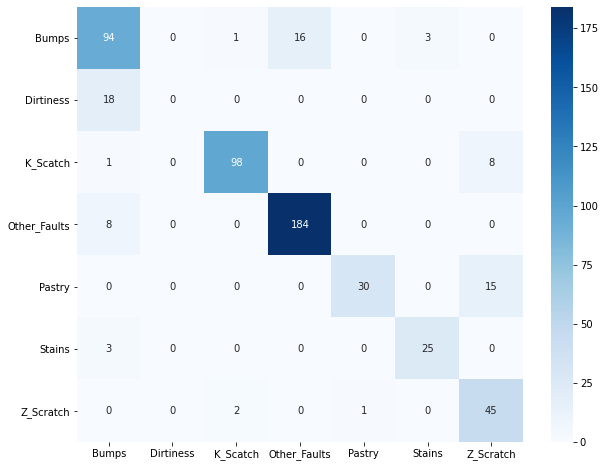

In [ ]:
from sklearn import metrics

inversed = le.inverse_transform(y4)
categories = le.classes_.tolist()
cf_matrix = metrics.confusion_matrix(y_true=y_test4,y_pred=y_predict4)

plt.figure(figsize=(10,8))
ax = sns.heatmap(cf_matrix, 
                 annot=True, 
                 fmt='g', 
                 cmap='Blues',
                 xticklabels=categories,
                 yticklabels=categories)

print("Accuracy: ", metrics.accuracy_score(y_test4, y_predict4))


## 2.5

Model performed quite well, once again it failed in classifing Dirtiness correctly, and this needs further optimization. Apart from this, the model has performed very well. However, I was only provided with 100 test datapoints and I would like to perform a test on a bigger dataset before accepting the model. 

In [ ]:
# read in the new dataset
col = dfDefects.columns
dfNewDefects = pd.read_csv('drive/My Drive/Colab Notebooks/ENGR 301/Lab 4/new_defects_data.csv',
                           header = None,
                           names = col)


dfNewDefects.head()
dfNewDefects.shape

(101, 29)

In [ ]:
# encode for classification
le2 = LabelEncoder()
y5 = le.fit_transform(dfNewDefects["fault_type"])
x5 = dfNewDefects.drop("fault_type", axis=1)

In [ ]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(x5,y5,test_size=1)

In [ ]:
y_predict5 = logisticModel1.predict(x5)
y_predict5
y5

array([3, 0, 3, 3, 3, 6, 1, 3, 2, 4, 4, 2, 1, 3, 3, 2, 0, 3, 0, 5, 2, 0,
       4, 6, 0, 0, 2, 3, 3, 0, 3, 3, 3, 3, 3, 4, 3, 3, 3, 0, 3, 3, 6, 2,
       3, 4, 0, 3, 3, 0, 3, 3, 2, 0, 3, 3, 2, 6, 3, 2, 3, 0, 3, 5, 1, 5,
       3, 3, 6, 3, 3, 2, 3, 6, 3, 3, 0, 2, 3, 3, 3, 6, 2, 2, 3, 6, 2, 0,
       3, 3, 6, 2, 0, 3, 5, 0, 0, 6, 4, 1, 3])

Accuracy:  0.8415841584158416


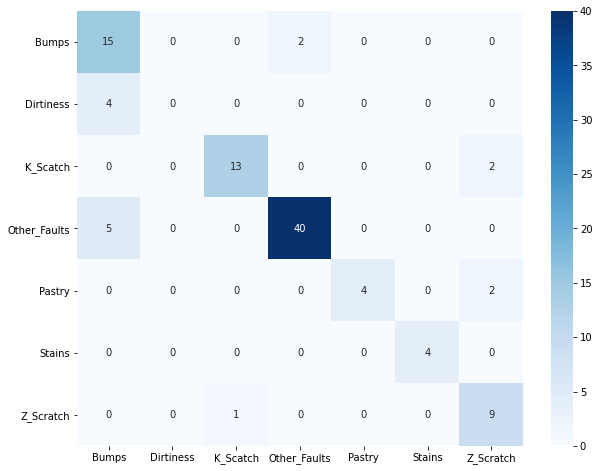

In [ ]:
from sklearn import metrics

inversed = le.inverse_transform(y5)
categories = le.classes_.tolist()
cf_matrix = metrics.confusion_matrix(y_true=y5,y_pred=y_predict5)

plt.figure(figsize=(10,8))
ax = sns.heatmap(cf_matrix, 
                 annot=True, 
                 fmt='g', 
                 cmap='Blues',
                 xticklabels=categories,
                 yticklabels=categories)

print("Accuracy: ", metrics.accuracy_score(y5, y_predict5))
